# Customer segmentation using clustering

## 🎯 Objetivo:
Usar técnicas de clustering no supervisado (KMeans) para identificar segmentos de clientes basados en comportamiento financiero: monto de facturación, pagos y frecuencia.

## 📘 Variable Dictionary — Credit Card Customer Segmentation Dataset

| **Variable**                        | **Type**     | **Description**                                                                 |
|-------------------------------------|--------------|---------------------------------------------------------------------------------|
| `CUST_ID`                          | Categorical  | Unique customer identifier (used only for reference; excluded from modeling)   |
| `BALANCE`                          | Numerical    | Average monthly balance on the card                                            |
| `BALANCE_FREQUENCY`                | Numerical    | Frequency of balance updates (values between 0 and 1; 1 = very frequent)       |
| `PURCHASES`                        | Numerical    | Total amount of purchases made                                                 |
| `ONEOFF_PURCHASES`                 | Numerical    | Purchases made in a single transaction                                         |
| `INSTALLMENTS_PURCHASES`           | Numerical    | Purchases made through installments                                            |
| `CASH_ADVANCE`                     | Numerical    | Amount of cash advances taken                                                  |
| `PURCHASES_FREQUENCY`              | Numerical    | Fraction of months with at least one purchase                                  |
| `ONEOFF_PURCHASES_FREQUENCY`       | Numerical    | Fraction of months with one-off purchases                                      |
| `PURCHASES_INSTALLMENTS_FREQUENCY`| Numerical    | Fraction of months with installment purchases                                  |
| `CASH_ADVANCE_FREQUENCY`           | Numerical    | Fraction of months with cash advances                                          |
| `CASH_ADVANCE_TRX`                 | Numerical    | Number of cash advance transactions                                            |
| `PURCHASES_TRX`                    | Numerical    | Number of purchase transactions                                                |
| `CREDIT_LIMIT`                     | Numerical    | Credit limit assigned to the customer                                          |
| `PAYMENTS`                         | Numerical    | Total amount paid by the customer                                              |
| `MINIMUM_PAYMENTS`                | Numerical    | Total of minimum payments made by the customer                                 |
| `PRC_FULL_PAYMENT`                 | Numerical    | Percentage of months where the customer paid the full balance                  |
| `TENURE`                           | Numerical    | Number of months the customer has been active                                  |


## Setup

### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# ML - Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ML - Metrics
from sklearn.metrics import silhouette_score

### Load dataset from Kaggle or local upload

In [ ]:
# https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

# Load dataset from Kaggle or local upload
df = pd.read_csv('/content/drive/MyDrive/Data Science/Github/CC GENERAL.csv')

## Exploratory Data Analysis(EDA)

### First values

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
# Check basic structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


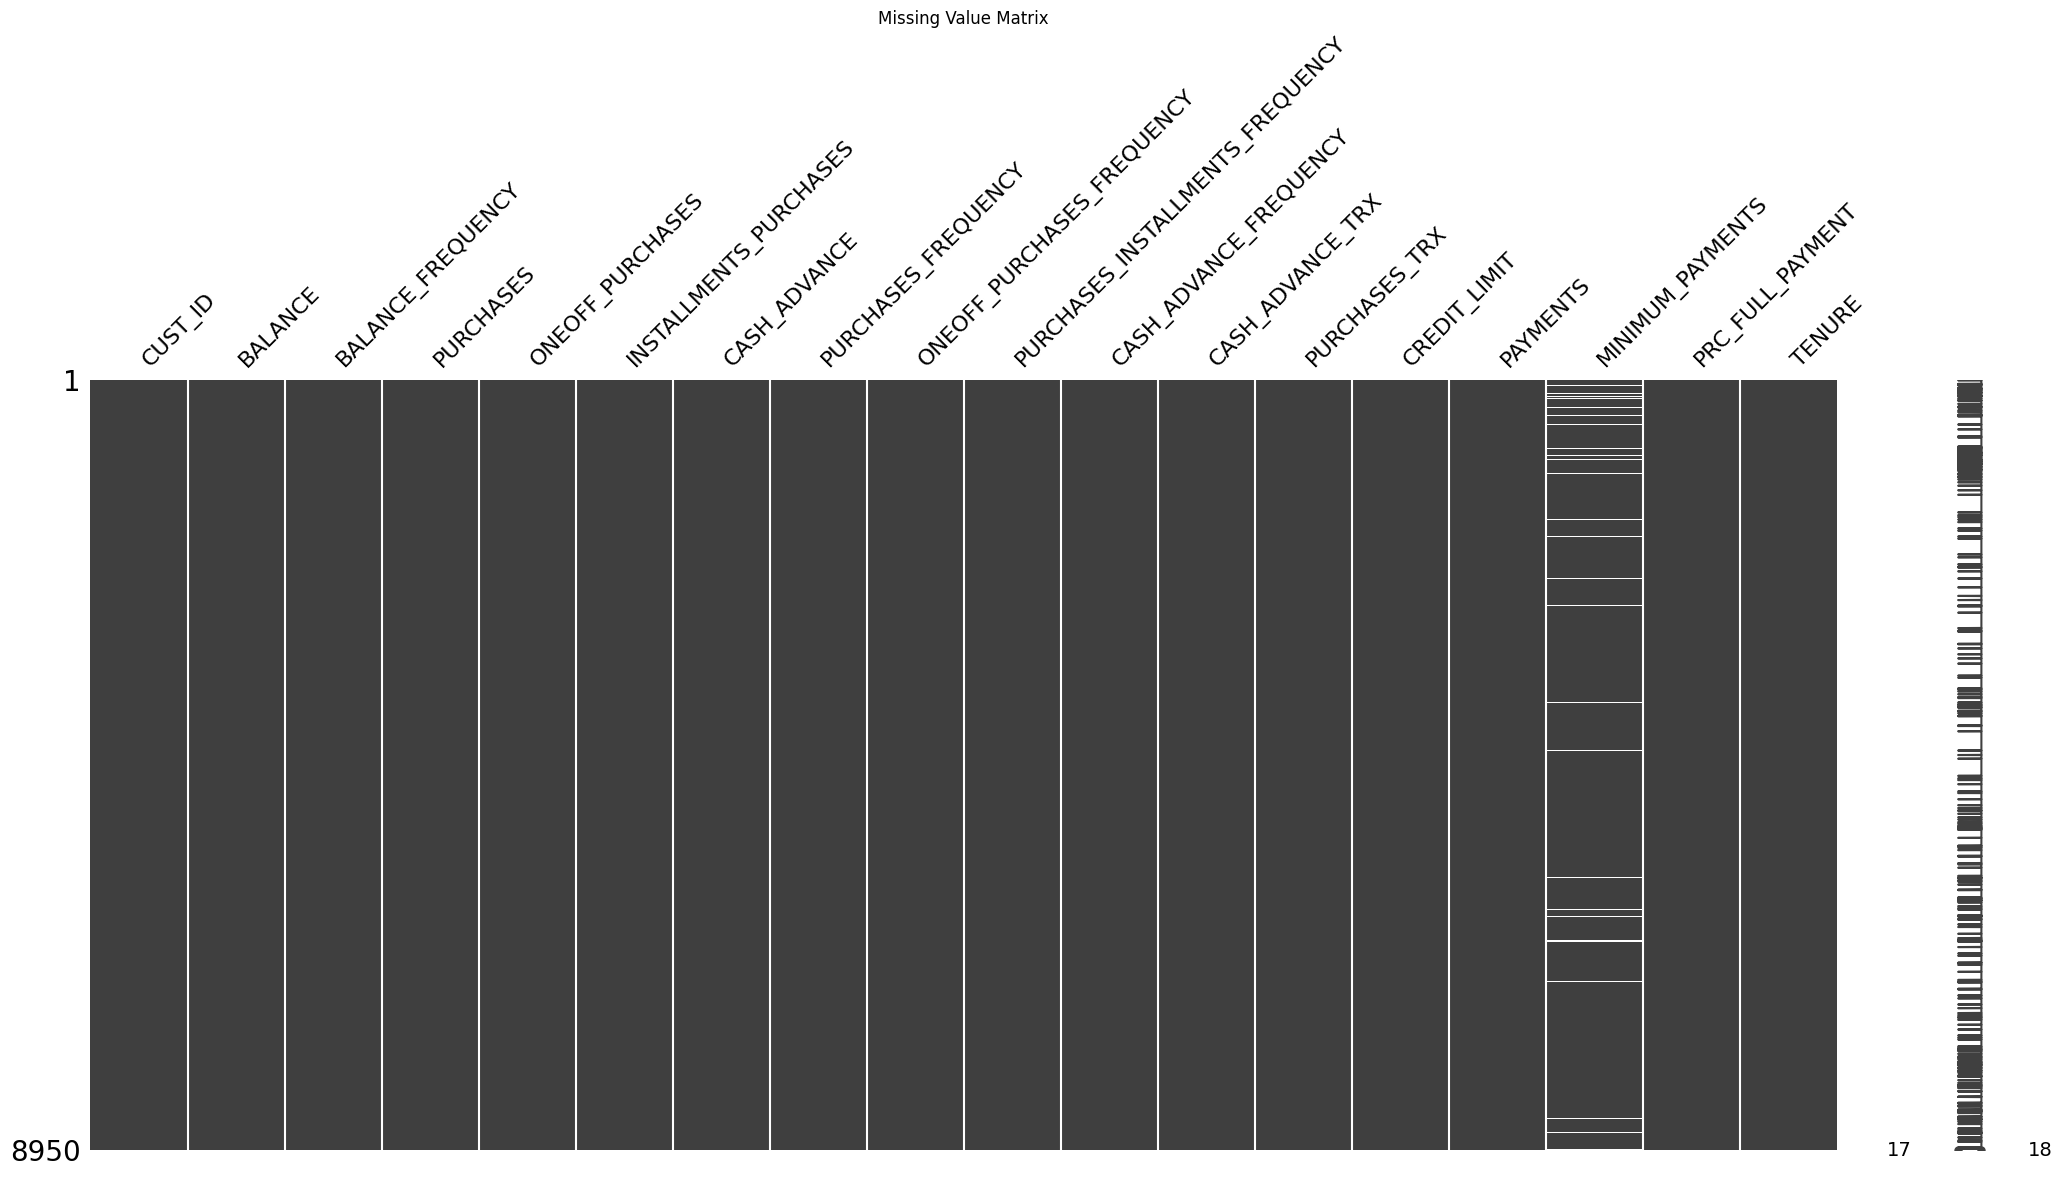

In [ ]:
# Missing values overview

msno.matrix(df)
plt.title("Missing Value Matrix")
plt.show()

In [ ]:
# Count missing values
df.isnull().sum().sort_values(ascending=False)

,0
MINIMUM_PAYMENTS,313
CREDIT_LIMIT,1
BALANCE,0
CUST_ID,0
BALANCE_FREQUENCY,0
PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0


In [ ]:
# Drop non-informative ID column
df.drop('CUST_ID', axis=1, inplace=True)

# Check % of missing
missing_ratio = df.isnull().mean()
print(missing_ratio[missing_ratio > 0])

# Simple imputation (can be improved later)
df.fillna(df.median(), inplace=True)

CREDIT_LIMIT        0.000112
MINIMUM_PAYMENTS    0.034972
dtype: float64


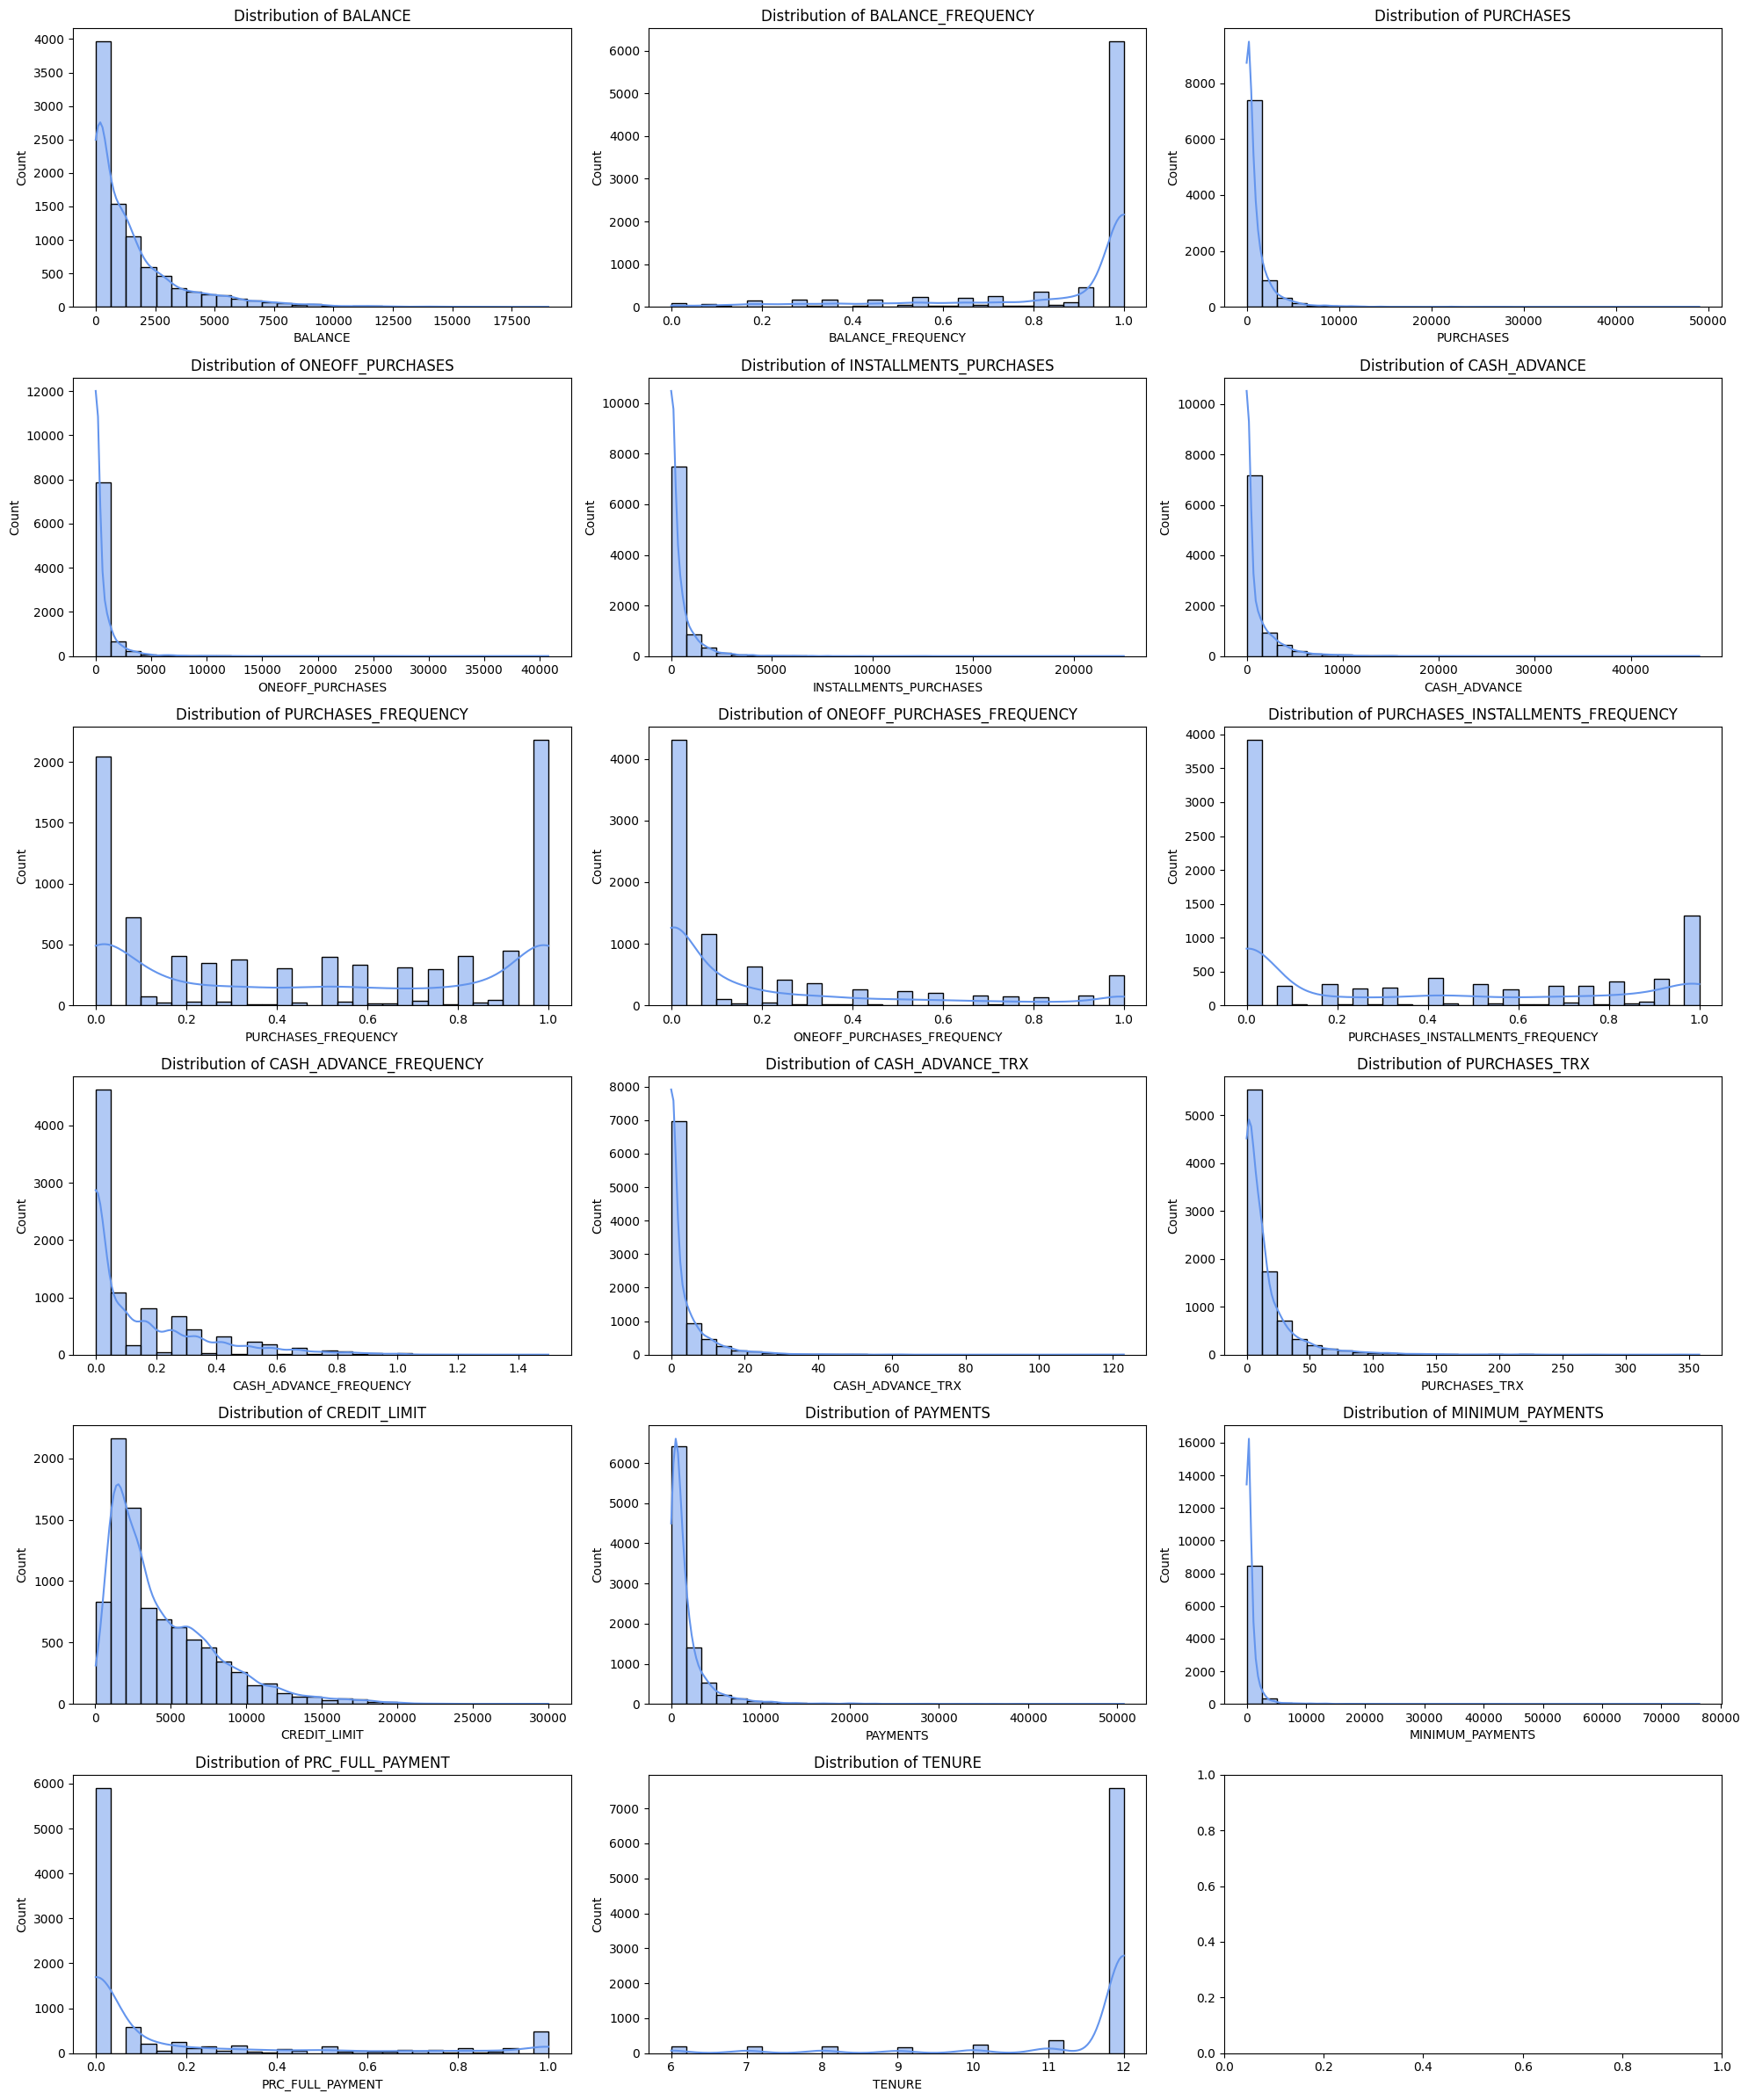

In [ ]:
# Plot distribution of numerical features
import seaborn as sns

fig, axes = plt.subplots(6, 3, figsize=(20, 24))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=30, ax=axes[i], kde=True, color='cornflowerblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)

plt.tight_layout()
plt.show()

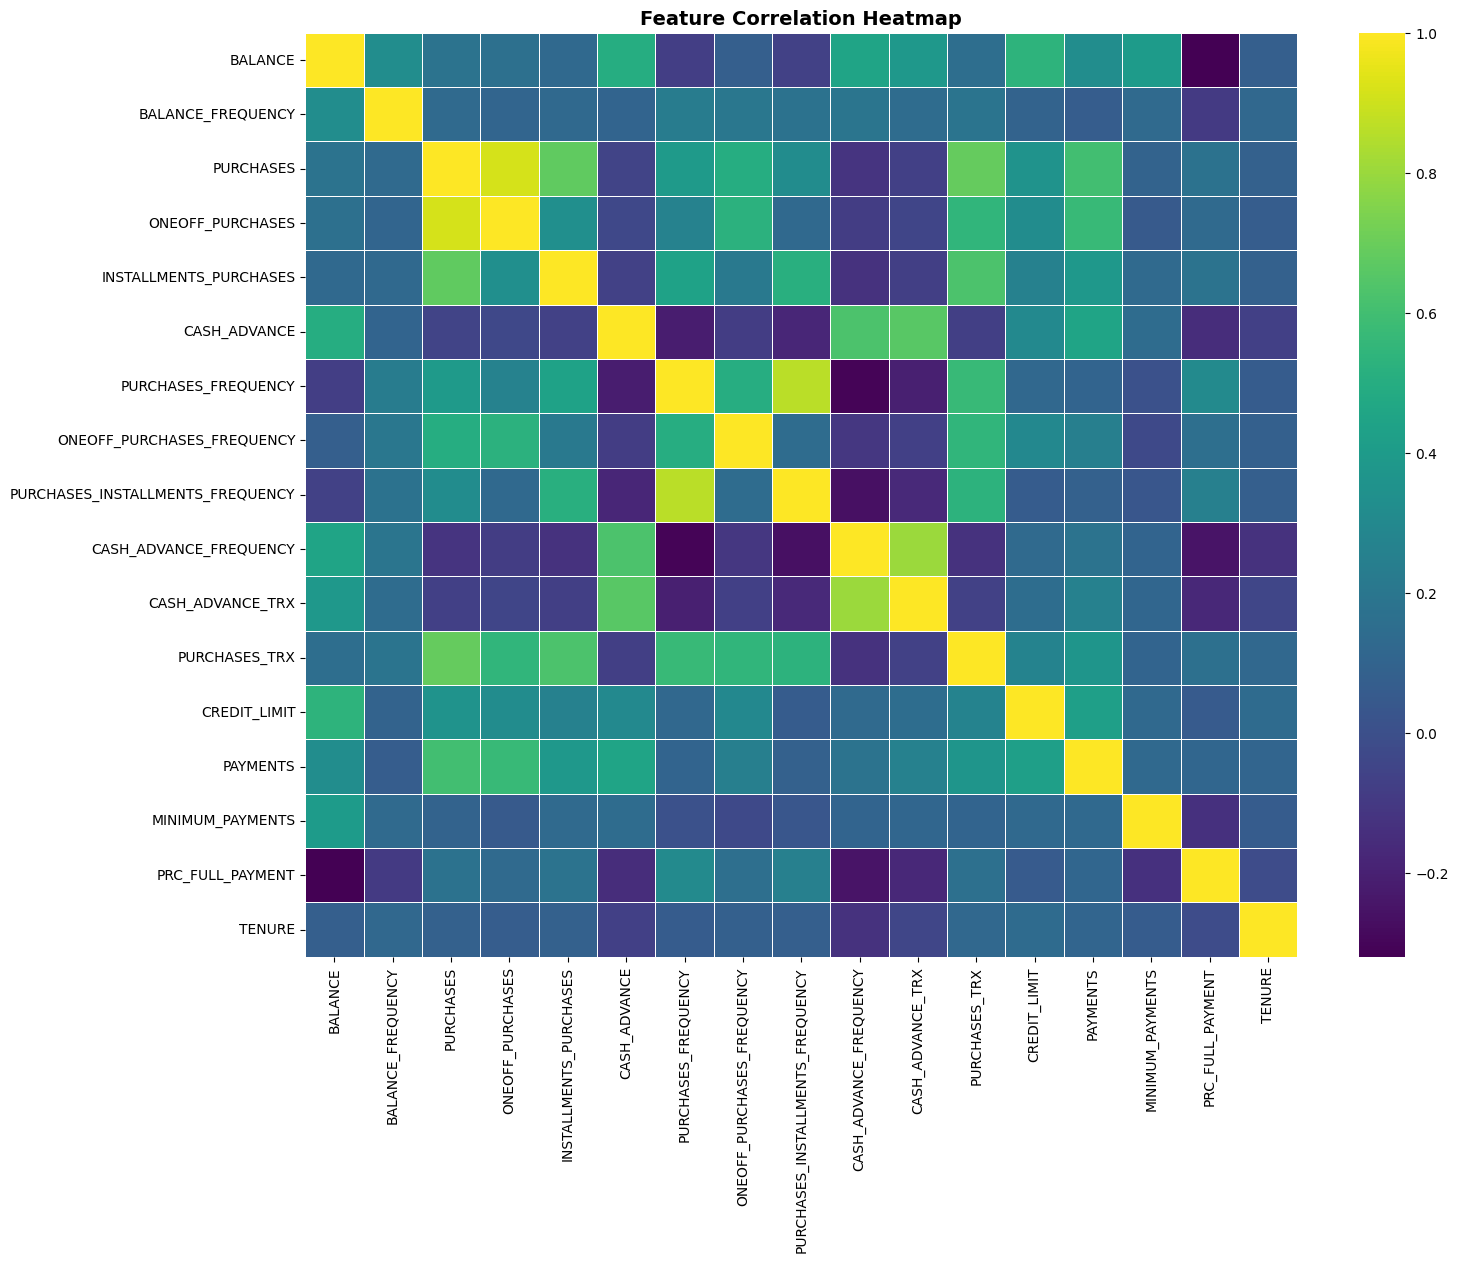

In [ ]:
# Correlation matrix
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=False, cmap='viridis', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold')
plt.show()

## Machine Learning - Preprocessing

In [ ]:
# Initialize scaler and apply
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Optional: convert back to DataFrame for easier interpretation
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns)

In [ ]:
# Set number of components (adjustable)
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Report how many components were kept
print(f"Original dimensions: {X_scaled.shape[1]}")
print(f"Reduced dimensions: {X_pca.shape[1]}")

Original dimensions: 17
Reduced dimensions: 12


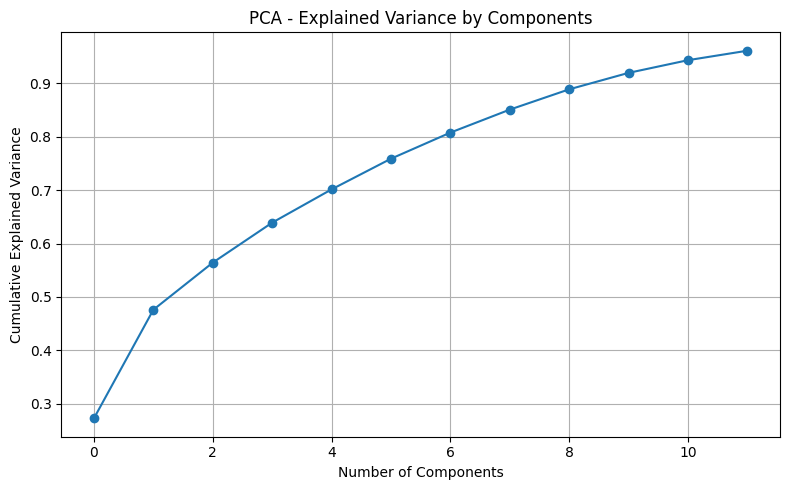

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance by Components")
plt.grid()
plt.tight_layout()
plt.show()

## Machine Learning - Model (Clustering - KMeans with PCA features)

### Run KMeans on PCA output

In [ ]:
# Try different values of k
scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.3f}")

Silhouette Score for k=2: 0.284
Silhouette Score for k=3: 0.254
Silhouette Score for k=4: 0.209
Silhouette Score for k=5: 0.197
Silhouette Score for k=6: 0.208
Silhouette Score for k=7: 0.220
Silhouette Score for k=8: 0.213
Silhouette Score for k=9: 0.211
Silhouette Score for k=10: 0.203


### Visualize Silhouette Scores

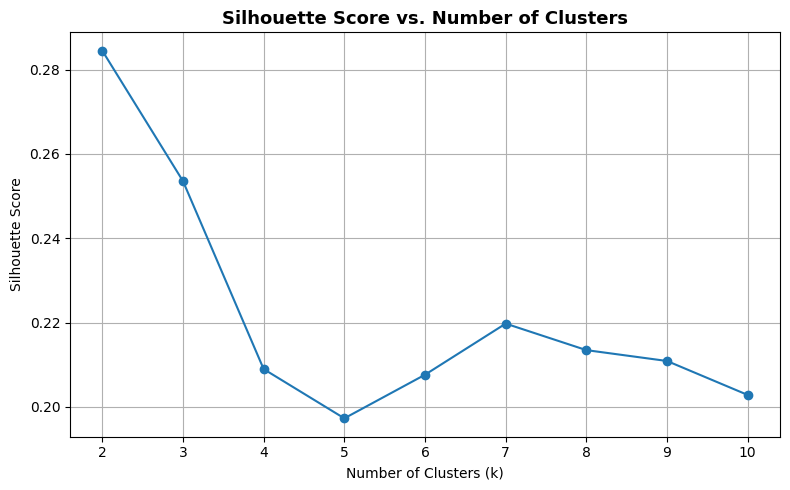

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(k_values, scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters", fontsize=13, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


### Final KMeans with selected k

In [ ]:
# Fit final model
best_k = 4  # Replace with your chosen value
kmeans_final = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans_final.fit_predict(X_pca)

# Assign cluster labels to original DataFrame
df['Cluster'] = clusters

### 📊 Cluster Profiling — Behavioral Summary

To understand the nature of each cluster, we analyze the average values of key features grouped by cluster label. This allows us to describe each segment's behavior and highlight differences across spending, credit use, and payment patterns.


In [ ]:
# Profile each cluster
cluster_profile = df.groupby('Cluster').mean().round(2)
cluster_profile.T.sort_index()

Cluster,0,1,2,3
BALANCE,4579.82,922.92,3689.77,999.13
BALANCE_FREQUENCY,0.97,0.94,0.99,0.79
CASH_ADVANCE,4484.24,214.36,747.86,584.88
CASH_ADVANCE_FREQUENCY,0.48,0.04,0.08,0.11
CASH_ADVANCE_TRX,14.23,0.80,2.35,2.08
CREDIT_LIMIT,7505.75,4296.53,9790.46,3266.49
INSTALLMENTS_PURCHASES,178.90,656.98,2718.51,63.00
MINIMUM_PAYMENTS,2025.05,650.39,2081.84,538.96
ONEOFF_PURCHASES,311.42,624.00,5401.20,210.17
ONEOFF_PURCHASES_FREQUENCY,0.14,0.31,0.74,0.09


In [ ]:
# Add customer count
cluster_profile['Num_Customers'] = df['Cluster'].value_counts().sort_index()
cluster_profile

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Num_Customers
Cluster,,,,,,,,,,,,,,,,,,
0,4579.82,0.97,490.23,311.42,178.90,4484.24,0.28,0.14,0.18,0.48,14.23,7.50,7505.75,3449.83,2025.05,0.03,11.39,1209
1,922.92,0.94,1280.71,624.00,656.98,214.36,0.89,0.31,0.72,0.04,0.80,22.82,4296.53,1370.86,650.39,0.27,11.60,3368
2,3689.77,0.99,8118.08,5401.20,2718.51,747.86,0.95,0.74,0.79,0.08,2.35,92.04,9790.46,7760.50,2081.84,0.29,11.96,367
3,999.13,0.79,272.90,210.17,63.00,584.88,0.18,0.09,0.09,0.11,2.08,2.98,3266.49,967.45,538.96,0.08,11.44,4006


### Visualize clusters (2D PCA)

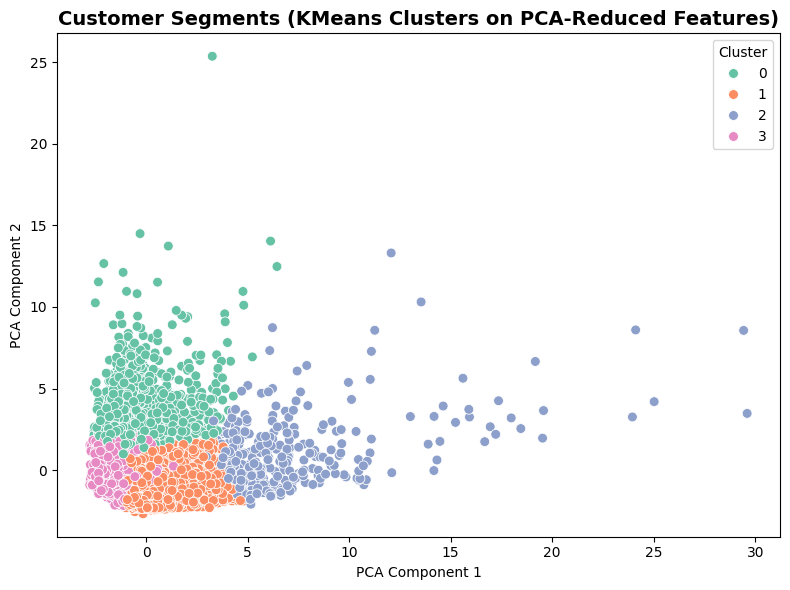

In [ ]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=clusters, palette='Set2', s=50)
plt.title("Customer Segments (KMeans Clusters on PCA-Reduced Features)", fontsize=14, fontweight='bold')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

## 📌 Final Interpretation and Insights (with Cluster Profiling)

This project aimed to segment credit card customers using unsupervised learning, focusing on behavioral features such as balance levels, payment behavior, and purchase activity.

### 🔍 Methodology Recap:
- Data was cleaned, scaled, and transformed using **PCA**, retaining 95% of variance.
- **KMeans clustering** was applied to the reduced dataset.
- The optimal number of clusters (**k = 4**) was selected based on the **Silhouette Score**.
- Cluster assignments were visualized using the top two PCA components.

### 📊 Cluster Profiles:

By analyzing the average feature values per cluster, we derived behavioral insights for each segment:

- **Cluster 0 – Low Balance, Conservative Users**  
  Customers with low average balances and frequent full payments. Limited purchase activity and low credit usage.

- **Cluster 1 – High Spenders with Active Payments**  
  High purchase volume and frequent transactions, balanced by high credit limits and consistent repayments.

- **Cluster 2 – Installment-Oriented Moderate Users**  
  Prefer installment-based purchases over one-off spending. Medium credit usage and regular payments.

- **Cluster 3 – Cash Advance Risk Group**  
  Characterized by frequent cash advances and low full payment ratios. Possibly higher-risk customers in financial distress.

These segments reveal **meaningful customer archetypes**, which can support data-driven marketing, credit risk strategies, and personalized financial product offerings.

### 📈 Next Steps:
- Integrate clustering output into dashboards for business teams.
- Explore time-based behavior shifts per cluster (e.g., seasonal trends).
- Compare clustering results using alternative techniques like **Hierarchical Clustering** or **DBSCAN**.

This notebook demonstrates a complete unsupervised learning workflow: from preprocessing and dimensionality reduction to clustering, profiling, and business interpretation — aligned with real-world financial applications.

---

*End of notebook.*